# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [78]:
base = pd.read_csv('M7_app_skl.csv')
base

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,occ_Laborers,occ_Low-skill Laborers,occ_Managers,occ_Medicine staff,occ_Private service staff,occ_Realty agents,occ_Sales staff,occ_Secretaries,occ_Security staff,occ_Waiters/barmen staff
0,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
1,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
3,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
4,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5150337,0,112500.0,-9188,-1193,1,0,0,0,1.0,...,True,False,False,False,False,False,False,False,False,False
537663,5150337,0,112500.0,-9188,-1193,1,0,0,0,1.0,...,True,False,False,False,False,False,False,False,False,False
537664,5150337,0,112500.0,-9188,-1193,1,0,0,0,1.0,...,True,False,False,False,False,False,False,False,False,False
537665,5150337,0,112500.0,-9188,-1193,1,0,0,0,1.0,...,True,False,False,False,False,False,False,False,False,False


In [79]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 56 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 537667 non-null  int64  
 1   CNT_CHILDREN                       537667 non-null  int64  
 2   AMT_INCOME_TOTAL                   537667 non-null  float64
 3   DAYS_BIRTH                         537667 non-null  int64  
 4   DAYS_EMPLOYED                      537667 non-null  int64  
 5   FLAG_MOBIL                         537667 non-null  int64  
 6   FLAG_WORK_PHONE                    537667 non-null  int64  
 7   FLAG_PHONE                         537667 non-null  int64  
 8   FLAG_EMAIL                         537667 non-null  int64  
 9   CNT_FAM_MEMBERS                    537667 non-null  float64
 10  interesse                          537667 non-null  int64  
 11  gen_F                              5376

In [80]:
#Separe 70% da base para treinamento e 30% para validação. 

In [81]:
y = base['interesse']

In [82]:
X = base.drop(columns=['interesse', 'ID'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [85]:
#1. Defina um objeto com a função da árvore de decisão vista em aula.
#2. Treine o modelo com os dados que você separou para treinamento
modelo = DecisionTreeClassifier(random_state=100)
modelo = modelo.fit(X_train,y_train)

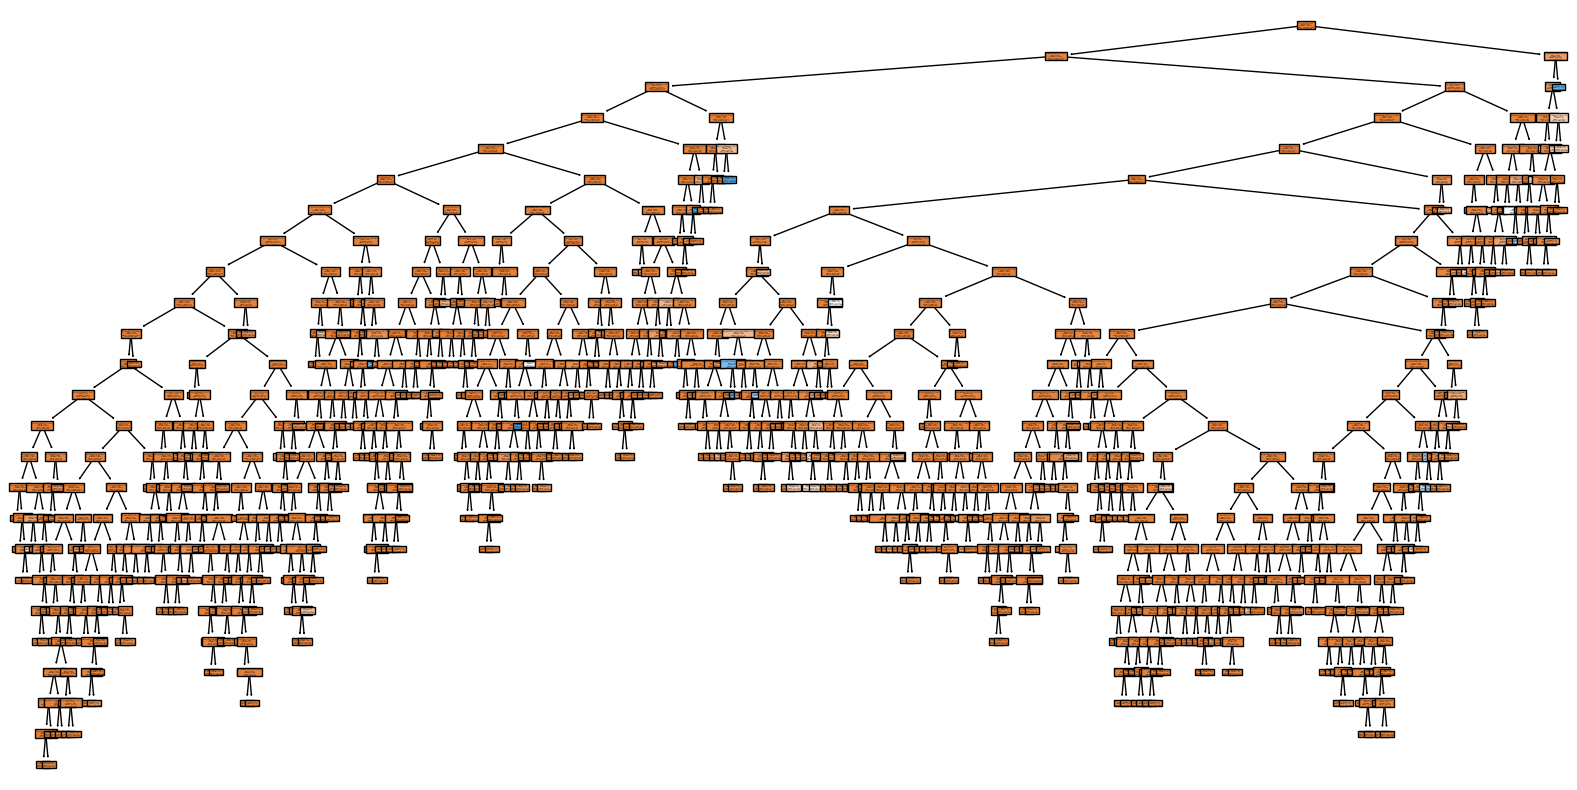

In [128]:
#3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(20,10))
plot_tree(modelo, 
               filled=True, 
               feature_names=X_train.columns, 
               class_names=['reprovado', 'aprovado'])
plt.show()

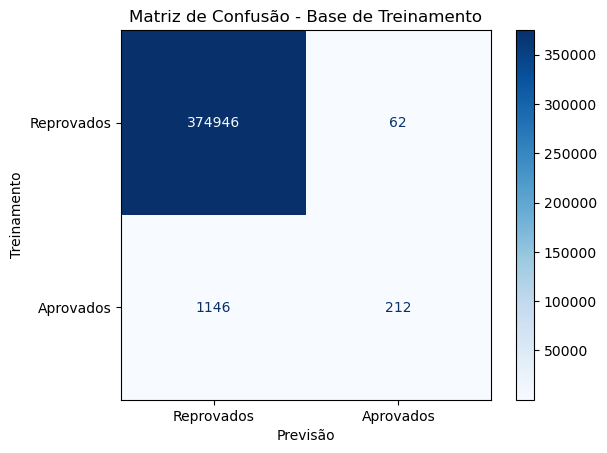

In [117]:
#4. Produza uma visualização da matriz de classificação (ou matriz de confusão)
y_previsao = modelo.predict(X_train)

matriz = confusion_matrix(y_train, y_previsao)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Reprovados", "Aprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Previsão")
plt.ylabel("Treinamento")
plt.title("Matriz de Confusão - Base de Treinamento")
plt.show()

In [121]:
#5. Calcule a acurácia na base de treinamento
y_train_previsao = modelo.predict(X_train)
acu_treinamento = accuracy_score(y_train, y_train_previsao)
print(f'A acurácia da base de treinamento é {acu_treinamento}.')

A acurácia da base de treinamento é 0.9967903583214212.


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [113]:
#1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.

y_previsao = modelo.predict(X_test)

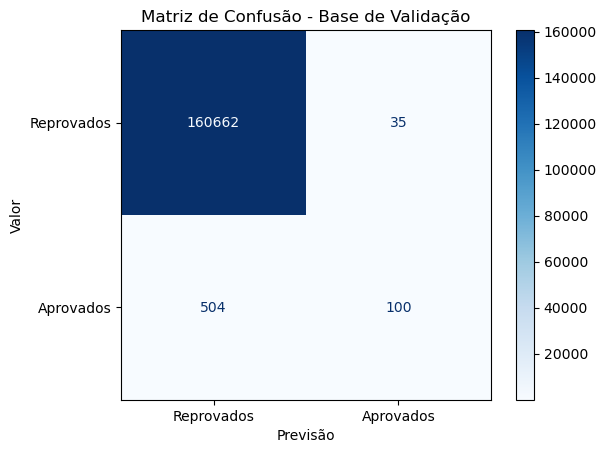

In [119]:
#2. Produza a visualização da matriz de confusão para a base de teste.
matriz2 = confusion_matrix(y_test, y_previsao)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz2, display_labels=["Reprovados", "Aprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Previsão")
plt.ylabel("Valor")
plt.title("Matriz de Confusão - Base de Validação")
plt.show()

In [125]:
#3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
y_test_previsao = modelo.predict(X_test)
acu_validacao = accuracy_score(y_test, y_test_previsao)
print(f'A acurácia da base de validação é {acu_validacao}.')
print(f'A acurácia da base de treinamento é {acu_treinamento}.')

A acurácia da base de validação é 0.9966584212125157.
A acurácia da base de treinamento é 0.9967903583214212.


As acurácias obtidas na base de teste (0,9966) e na base de treinamento (0,9967) são extremamente próximas, com uma diferença marginal de apenas 0,0001. Essa proximidade indica uma boa generalização do modelo, que consegue manter um desempenho consistente em ambos os conjuntos de dados. A existência dessa pequena diferença sugere que o modelo não está sofrendo overfitting, o que é um sinal positivo de sua capacidade de generalização.

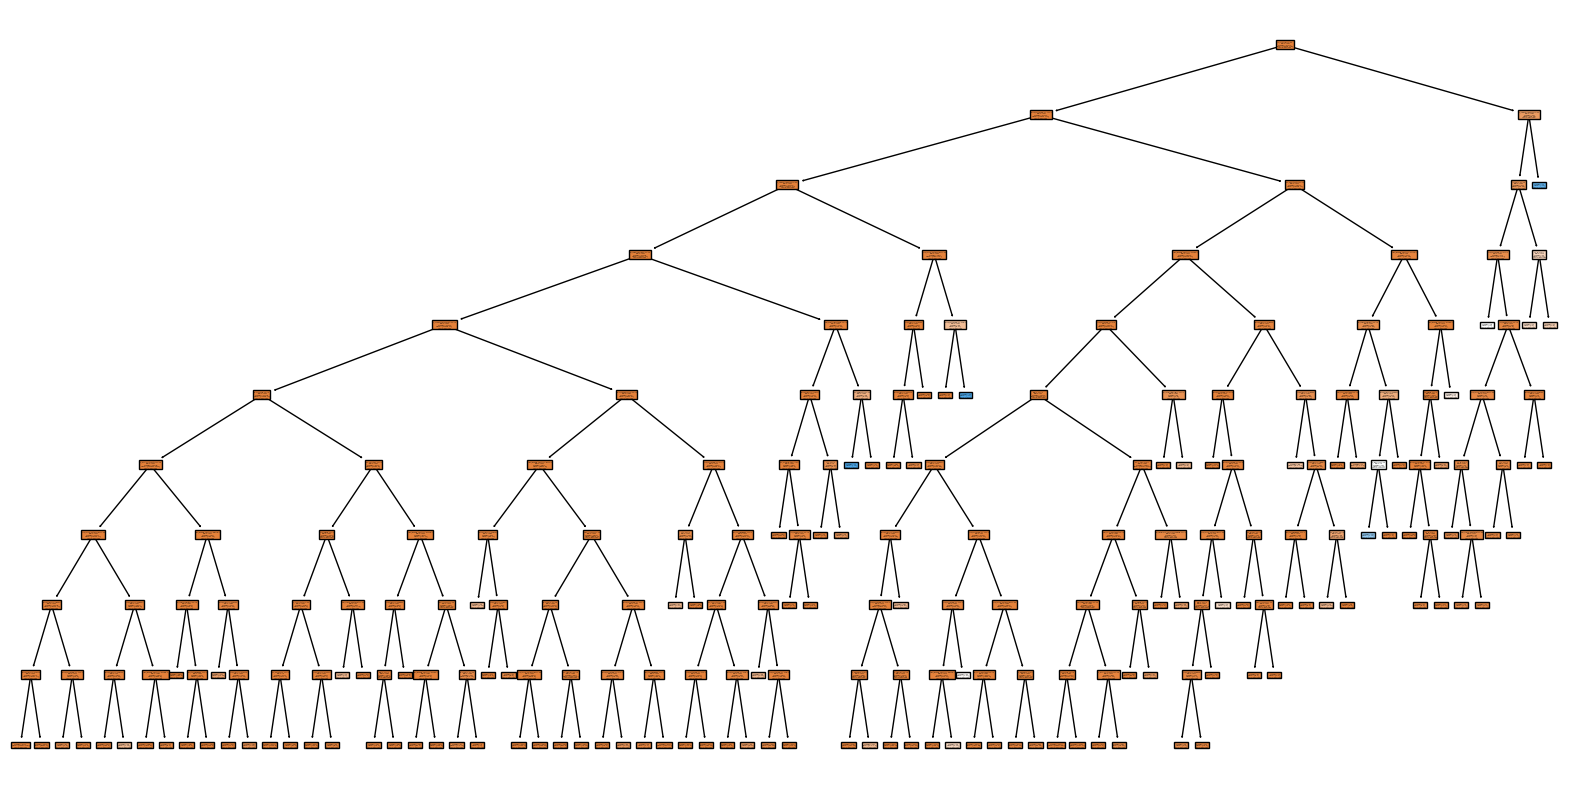

In [129]:
#4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. 
#Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?


modelo_podado = DecisionTreeClassifier(random_state=123, 
                                       min_samples_leaf=5, 
                                       max_depth=10)

modelo_podado = modelo_podado.fit(X_train,y_train)


plt.figure(figsize=(20,10))
plot_tree(modelo_podado,
          filled=True, 
          feature_names=X_train.columns, 
          class_names=['reprovado', 'aprovado'])
plt.show()

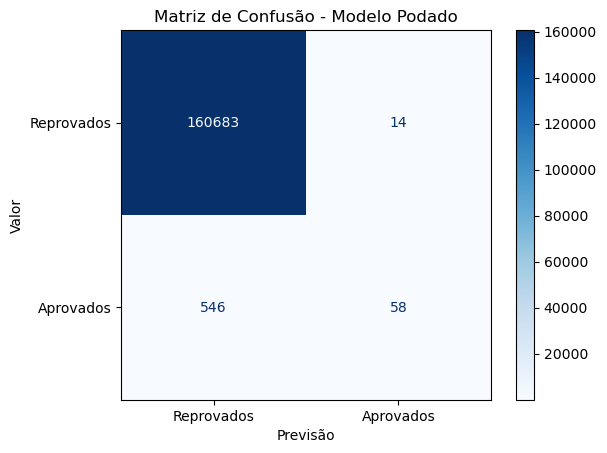

In [134]:
y_previsao_podado = modelo_podado.predict(X_test) 

matriz_modelo_podado = confusion_matrix(y_test, y_previsao_podado)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_modelo_podado, display_labels=["Reprovados", "Aprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Previsão")
plt.ylabel("Valor")
plt.title("Matriz de Confusão - Modelo Podado")
plt.show()

In [196]:
prop_rep = sum(y_previsao == 1)/len(y_previsao)
print(f"Proporção de proponentes classificados como 'reprovado' segundo o modelo: {prop_rep:2%}")

prop_rep_pod = sum(y_previsao_podado == 1)/len(y_previsao_podado)
print(f"Proporção de proponentes classificados como 'reprovado' segundo o modelo podado: {prop_rep_pod:2%}")

Proporção de proponentes classificados como 'reprovado' segundo o modelo: 0.072801%
Proporção de proponentes classificados como 'reprovado' segundo o modelo podado: 0.044637%


Ao comparar os dois modelos, observa-se que a proporção de proponentes classificados como 'reprovado' diminuiu em aproximadamente 0,03% no modelo podado em relação ao modelo original. Essa redução pode indicar que o modelo podado está sendo mais conservador na classificação de proponentes como 'reprovado', o que pode estar relacionado ao ajuste nos parâmetros de profundidade e número mínimo de observações por folha.

In [203]:
#5.Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
total_contratos = len(y_test)

contratos_bons = sum(y_test == 0)  

acuracia_todos_bons = contratos_bons / total_contratos

print(f"Acurácia se todos fossem classificados como 'bons': {acuracia_todos_bons:.2%}")

Acurácia se todos fossem classificados como 'bons': 99.63%
